La detección de anomalías es una técnica que se utiliza para identificar patrones inusuales que no se ajustan al comportamiento esperado, llamados valores atípicos.

Utilizaremos la detección de fraudes con tarjetas de crédito como el caso de estudio para comprender este concepto en detalle.

En este proyecto vamos a tomar la detección de fraude con tarjetas de crédito como el caso de estudio utilizando las siguientes técnicas de detección de detección de anomalías:

*   Algoritmo de bosque de aislamiento o Insolation forest
*   Algoritmo de detección de anomalías basado en densidad o Density-Based Anomaly Detection (Local Outlier Factor)



In [39]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
hola= pd.read_csv('/content/datos/creditcard_a.csv')
hola2= pd.read_csv('/content/datos/creditcard_b.csv')

In [41]:
data = pd.concat([hola, hola2], ignore_index=True) #unificamos ambos datasets en un sólo dataframe

In [42]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [43]:
data1= data.sample(frac = 0.1,random_state=1) # Creamos una muestra aleatoria del 10% de los datos con una semilla aleatoria de 1

In [44]:
data.isnull().sum() #Comprobando los valores perdidos

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

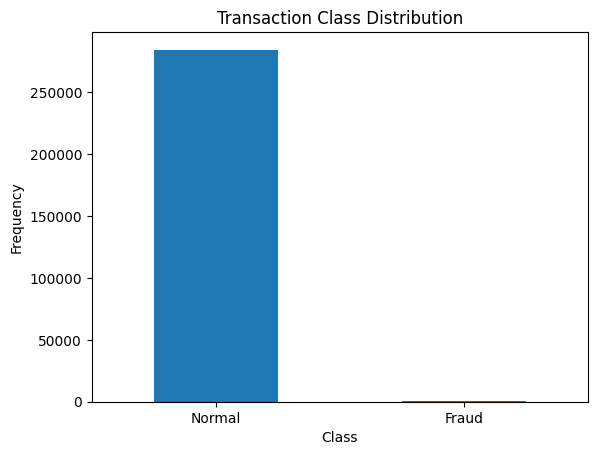

In [45]:
#Determinamos el número de fraudes y transacciones válidas en todo el conjunto de datos
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [46]:
#Clasificamos las clases de transacciones "0 = Normal y 1 = Fraude"
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

In [47]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [48]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

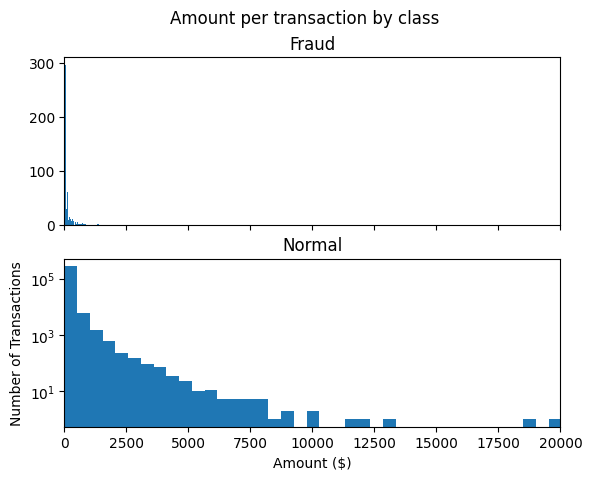

In [49]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # Creamos una figura con dos subgráficos apilados verticalmente
f.suptitle('Amount per transaction by class')  # Título de la figura

bins = 50  # Número de contenedores para el histograma

ax1.hist(Fraud.Amount, bins=bins)  # Creamos un histograma para la clase de fraude en el primer subgráfico
ax1.set_title('Fraud')  # Título del primer subgráfico

ax2.hist(Normal.Amount, bins=bins)  # Creamos un histograma para la clase normal en el segundo subgráfico
ax2.set_title('Normal')  # Título del segundo subgráfico

plt.xlabel('Amount ($)')  # Etiqueta del eje x
plt.ylabel('Number of Transactions')  # Etiqueta del eje y
plt.xlim((0, 20000))  # Limitamos el rango del eje x
plt.yscale('log')  # Establecemos la escala del eje y como logarítmica

plt.show()

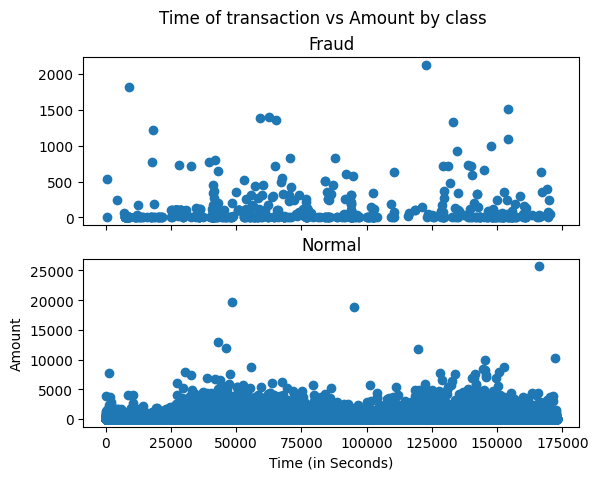

In [50]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # Creamos una figura con dos subgráficos apilados verticalmente
f.suptitle('Time of transaction vs Amount by class')  # Ttítulo de la figura

ax1.scatter(Fraud.Time, Fraud.Amount)  # Creamos un gráfico de dispersión para la clase de fraude en el primer subgráfico
ax1.set_title('Fraud')  # Título del primer subgráfico

ax2.scatter(Normal.Time, Normal.Amount)  # Creamos un gráfico de dispersión para la clase normal en el segundo subgráfico
ax2.set_title('Normal')  # Título del segundo subgráfico

plt.xlabel('Time (in Seconds)')  # Etiqueta del eje x
plt.ylabel('Amount')  # Etiqueta del eje y

plt.show()

In [51]:
#Determinamos el número de fraudes y transacciones validas.
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [52]:
#Imprimimos la cantidad de valores atípicos, el número de casos de fraude y transacciones válidas.
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


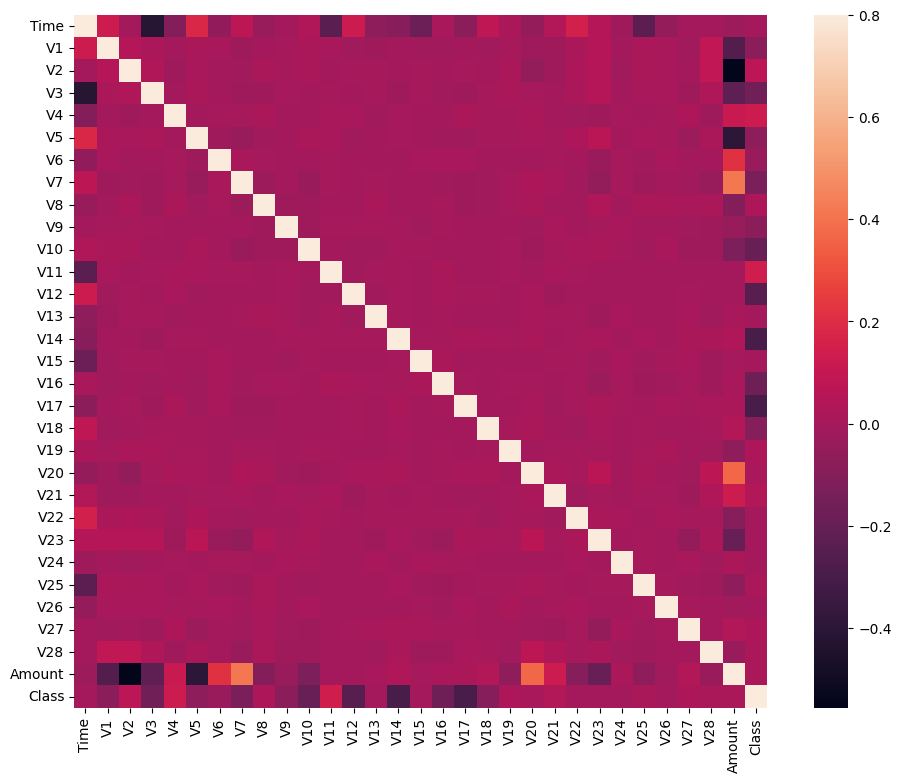

In [53]:
import seaborn as sns

#Matriz de correlación
correlation_matrix = data1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [54]:
#Tomamos todas las columnas del dataframe

import numpy as np

columns = data1.columns.tolist()
#Filtramos las columnas para borrar los datos que no queremos
columns = [c for c in columns if c not in ["Class"]]
#Guardamos la variable que estamos prediciendo
target = "Class"
#Definimos un estado aleatorio
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Imprimimos las formas de X y Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [55]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [56]:
#Definimos los métodos de detección de valores atípicos

classifiers={
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
}

In [57]:
import warnings #esto elimino los warnings de colab

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [58]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Isolation Forest":
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 75
Accuracy Score :
0.9973666654962958
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.24      0.24        49

    accuracy                           1.00     28481
   macro avg       0.62      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



# Conclusiones
El método del bosque de aislamiento o Insolation forest detectó 73 errores, en cambio, el LOP detectó 93 errores.

Isolation Forest tiene un 99,74% más de precisión que LOF de 99,67%.
Al comparar la precisión y recuperación de errores para 2 modelos, el bosque de aislamiento funcionó mucho mejor que el LOF, ya que podemos ver que la detección de casos de fraude es de alrededor del 23% en comparación con la tasa de detección de LOF de solo 2%.

Por lo tanto, el Método del bosque de aislamiento en general funcionó mucho mejor para determinar los casos de fraude, que es de alrededor del 30%.
Podemos mejorar esta precisión aumentando el tamaño de la muestra o utilizando algoritmos de deep learning, sin embargo, a costa de gastos computacionales

También podemos utilizar modelos complejos de detección de anomalías para obtener una mayor precisión en la detección de más casos fraudulentos.